In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from starkhelium import *
from tqdm import trange, tqdm
import os

In [90]:
# In an electric field (with B=0)
# quantum numbers
#nmin = 3
#nmax = 3
#S = 1

#m_vals = np.array([0,1,2])
#n_vals, L_vals, J_vals, neff, En, H_0, mat_S = [], [], [], [], [], [], []

#for m_val in m_vals:
#    n_vals_tmp, L_vals_tmp = get_nl_vals(nmin, nmax, m_val)
#    J_vals_tmp = get_J_vals(S, L_vals_tmp, diff=1)
#    # quantum defects
#    neff_tmp = n_vals_tmp - get_qd(S, n_vals_tmp, L_vals_tmp, J_vals_tmp)
#    # energy levels
#    En_tmp = W_n(S, n_vals_tmp, L_vals_tmp, J_vals_tmp)
#    # field-free Hamiltonian
#    H_0_tmp = np.diag(En_tmp)
#    # find the off-diagonal terms of the Stark interaction matrix
#    mat_S_tmp = stark_matrix(neff_tmp, L_vals_tmp, m_val, b_field=False)
    
#    # Save each m variable into arrays
#    n_vals.append(n_vals_tmp)
#    L_vals.append(L_vals_tmp)
#    J_vals.append(J_vals_tmp) 
#    neff.append(neff_tmp) 
#    En.append(En_tmp) 
#    H_0.append(H_0_tmp)
#    mat_S.append(mat_S_tmp)

In [93]:
nmin = 3
nmax = 3
S = 1
n_vals, L_vals, m_vals = get_nlm_vals(nmin, nmax)
J_vals = get_J_vals(S, L_vals, 1)
# quantum defects
neff = n_vals - get_qd(S, n_vals, L_vals, J_vals)
# energy levels
En = W_n(S, n_vals, L_vals, J_vals)
# field-free Hamiltonian
H_0 = np.diag(En)
mat_S = stark_matrix(neff, L_vals, m_vals, b_field=True)

calculate Stark terms: 100%|█████████████████████████████| 9/9 [00:00<?, ?it/s]


In [86]:
np.unique(m_vals)

array([-2, -1,  0,  1,  2])

In [42]:
# specify the electric field
#field = np.linspace(0.00, 10**7, 101) # V /cm
#field_au = field * 100 * e * a_0 / En_h

# diagonalise for each field
#eig_vals, eig_vecs = [], []
#for m_i, m_val in enumerate(m_vals):
#    eig_vals_tmp, eig_vecs_tmp = stark_map_vec(H_0[m_i], mat_S[m_i], field_au)
#    eig_vals.append(eig_vals_tmp)
#    eig_vecs.append(eig_vecs_tmp)

diagonalise Hamiltonian: 100%|████████████| 101/101 [00:00<00:00, 33666.43it/s]


In [87]:
# specify the electric field
field = np.linspace(0.00, 10**7, 101) # V /cm
field_au = field * 100 * e * a_0 / En_h
# diagonalise for each field
eig_vals, eig_vecs = stark_map_vec(H_0, mat_S, field_au)

diagonalise Hamiltonian:   0%|                         | 0/101 [00:00<?, ?it/s]C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



TypeError: unsupported operand type(s) for /: 'list' and 'float'

## Transition dipole moment between two states

In [43]:
m_i, m_f = 0, 1

m_idx_i, m_idx_f = np.where(m_vals==m_i)[0][0], np.where(m_vals==m_f)[0][0]
tm = np.zeros([len(L_vals[0]), 3])
tm_i = 0
for idx_i, L_val_i in enumerate(L_vals[m_idx_i]):
    for idx_f, L_val_f in enumerate(L_vals[m_idx_f]):
        if ( np.abs(L_val_i - L_val_f) == 1 ):
            
            tm[tm_i, 0] = L_val_i
            tm[tm_i, 1] = L_val_f
            tm[tm_i, 2] = stark_int(neff[m_idx_i][idx_i], neff[m_idx_f][idx_f], L_val_i, L_val_f, m_i, m_f)
            tm_i += 1

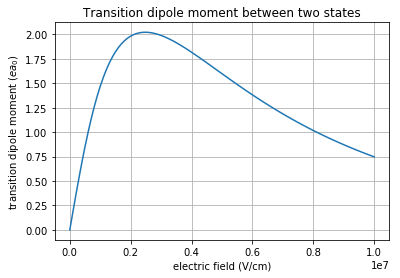

In [44]:
state_i = 0
state_f = 1

I = np.zeros(len(field))
for k, F in enumerate(field):
    
    Vi = eig_vecs[m_idx_i][k, state_i, :]
    Vf = eig_vecs[m_idx_f][k, state_f, :]
    
    for from_i in range(len(Vi)):
        for to_i in range(len(Vf)):    
            if np.abs(L_vals[m_idx_i][from_i] - L_vals[m_idx_f][to_i]) == 1: 
                for tm_i in range(len(tm[:,0])):
                    if (tm[tm_i,0] == L_vals[m_idx_i][from_i]) and (tm[tm_i,1] == L_vals[m_idx_f][to_i]):
                        I[k] += (Vi[from_i] * Vf[to_i] * np.abs(tm[tm_i,2]));
                        
plt.plot(field, np.abs(I))
plt.grid()
plt.xlabel('electric field (V/cm)')
plt.ylabel('transition dipole moment ($e a_0$)')
plt.title('Transition dipole moment between two states')

## Stark map

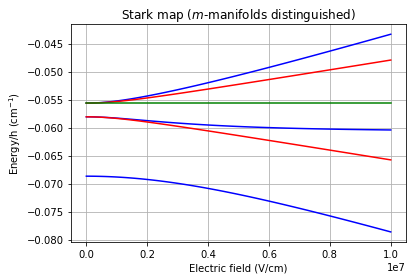

In [45]:
colours = ['b', 'r', 'g', 'k', 'm', 'c']

for i in range(len(m_vals)):
    for j in range(len(eig_vals[i][0])): 
        plt.plot(field, eig_vals[i][:,j], '-', color=colours[np.mod(i, len(colours))])
  
plt.grid()
plt.xlabel('Electric field (V/cm)')
plt.ylabel('Energy/h (cm$^{-1}$)')
plt.title('Stark map ($m$-manifolds distinguished)')

## Transition dipole moment between two states -2

State 1: 		 n= 3 , l= 0 , m= 0
State 2: 		 n= 3 , l= 2 , m= -1


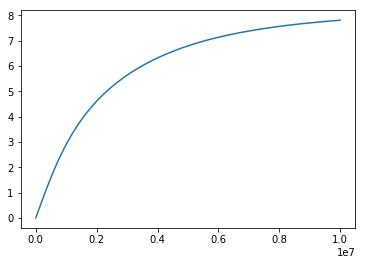

In [26]:
state_1 = 0
state_2 = 5
print('State 1: \t\t n=', n_vals[state_1], ', l=', L_vals[state_1], ', m=', m_vals[state_1])
print('State 2: \t\t n=', n_vals[state_2], ', l=', L_vals[state_2], ', m=', m_vals[state_2])

transition_dipole_moment = []
for i, f in enumerate(field):
    weightings = np.abs( np.outer( eig_vecs_ord[i,state_1], eig_vecs_ord[i,state_2] ) )
    transition_dipole_moment.append( np.sum( mat_S * weightings ) )

plt.plot(field, transition_dipole_moment)

## State character of a state

State: 		 n= 7 , l= 0 , m= 0
Character: 	 n= 7 , l= 1 , m= 1


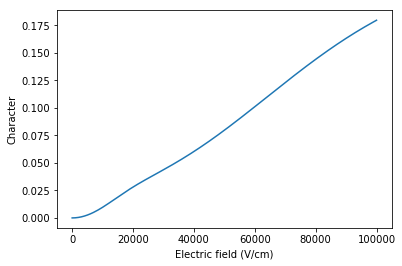

In [19]:
state = 5**2 + 6**2 + 0
character = 5**2 + 6**2 + 3
print('State: \t\t n=', n_vals[state], ', l=', L_vals[state], ', m=', m_vals[state])
print('Character: \t n=', n_vals[character], ', l=', L_vals[character], ', m=', m_vals[character])

plt.plot(field, np.abs(eig_vecs[:,state,character]**2))
plt.xlabel('Electric field (V/cm)')
plt.ylabel('Character')

## L character of a state

State: 		 n= 7 , l= 2 , m= 0
Character: 		 l= 2


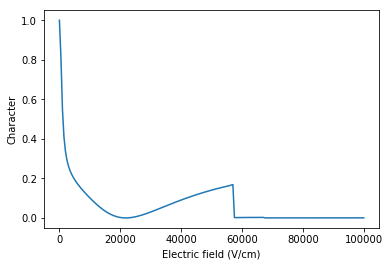

In [21]:
state = 5**2 + 6**2 + 6 
L_char = 2
print('State: \t\t n=', n_vals[state], ', l=', L_vals[state], ', m=', m_vals[state])
print('Character: \t\t l=', L_char )

eig_vec_with_char = eig_vecs[:, state, np.where(L_vals==L_char)]
plt.plot(field, np.sum( eig_vec_with_char**2, axis=2 ) )
plt.xlabel('Electric field (V/cm)')
plt.ylabel('Character')

## L character of states

State from: 		 n= 6 , l= 5 , m= 0
State to: 		 n= 7 , l= 2 , m= 0
Character: 		 l= 2


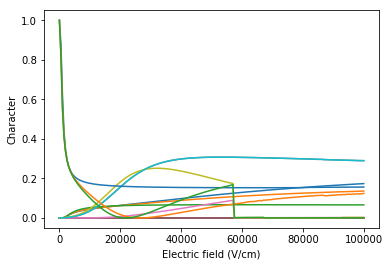

In [26]:
state_from = 5**2 + 6**2 - 6
state_to = 5**2 + 6**2 + 6
L_char = 2
print('State from: \t\t n=', n_vals[state_from], ', l=', L_vals[state_from], ', m=', m_vals[state_from])
print('State to: \t\t n=', n_vals[state_to], ', l=', L_vals[state_to], ', m=', m_vals[state_to])
print('Character: \t\t l=', L_char )

for state in np.arange(state_from, state_to+1, 1):
    eig_vec_with_char = eig_vecs[:, state, np.where(L_vals==L_char)]
    plt.plot(field, np.sum( eig_vec_with_char**2, axis=2 ) )

plt.xlabel('Electric field (V/cm)')
plt.ylabel('Character')